# Data Analysis Salaries Analysis and Classification

The aim of this project is to perform a complete Data Analysis on the dataset concerning the salary of Data Engineers from various companies and countries, and deploy a ML model that can predict the size of the company that the engineer works for

The dataset is taken from Kaggle and you can download It from here [Click here to download dataset](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)

Data Science Job Salaries Dataset contains 11 columns, each are:

    work_year: The year the salary was paid.
    experience_level: The experience level in the job during the year
    employment_type: The type of employment for the role
    job_title: The role worked in during the year.
    salary: The total gross salary amount paid.
    salary_currency: The currency of the salary paid as an ISO 4217 currency code.
    salaryinusd: The salary in USD
    employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    remote_ratio: The overall amount of work done remotely
    company_location: The country of the employer's main office or contracting branch
    company_size: The median number of people that worked for the company during the year


## Data Import and Understanding

Importing the libraries used for this project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Importing the dataset into our project

In [5]:
df = pd.read_csv('ds_salaries.csv')

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Exploratory Data Analysis

We're going to extract some insights from the data like the average, max, min and plot the salary in terms of other features

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Cleaning the dataset by dropping the rows that has NaN

In [7]:
df.dropna(inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Salary vs Year

Grouping the data showing the mean of the salary with Job Title in Years

In [8]:
salary_jobtitle_pivot_table = pd.pivot_table(df,values='salary_in_usd',index='work_year',columns='job_title',aggfunc='mean')
salary_jobtitle_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
work_year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,NaN,NaN,45896.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,148261.0,NaN,13036.0,NaN,NaN,246000.000000,NaN,15000.0,NaN
2021,12704.5,NaN,NaN,25410.6,NaN,82137.500000,NaN,230700.000,NaN,45555.0,...,192500.0,239152.4,NaN,NaN,NaN,NaN,83003.600000,NaN,NaN,105000.0
2022,30000.0,193768.000,40000.0,140815.0,137969.807018,160800.000000,NaN,89888.875,188311.111111,NaN,...,NaN,155499.0,190000.0,120000.0,8000.0,207870.000,142188.733333,NaN,NaN,NaN
2023,NaN,115252.875,70000.0,231232.5,170210.652174,56329.333333,99875.5,66461.500,191143.500000,7000.0,...,NaN,85847.0,NaN,16414.0,NaN,156114.375,177539.945455,62510.0,NaN,NaN


Cleaning the pivot table from the NaN

In [9]:
salary_jobtitle_pivot_table.replace(np.nan,0,inplace=True)
salary_jobtitle_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
work_year,,,,,,,,,,,,,,,,,,,,,
2020,0.0,0.000,0.0,45896.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,...,0.0,148261.0,0.0,13036.0,0.0,0.000,246000.000000,0.0,15000.0,0.0
2021,12704.5,0.000,0.0,25410.6,0.000000,82137.500000,0.0,230700.000,0.000000,45555.0,...,192500.0,239152.4,0.0,0.0,0.0,0.000,83003.600000,0.0,0.0,105000.0
2022,30000.0,193768.000,40000.0,140815.0,137969.807018,160800.000000,0.0,89888.875,188311.111111,0.0,...,0.0,155499.0,190000.0,120000.0,8000.0,207870.000,142188.733333,0.0,0.0,0.0
2023,0.0,115252.875,70000.0,231232.5,170210.652174,56329.333333,99875.5,66461.500,191143.500000,7000.0,...,0.0,85847.0,0.0,16414.0,0.0,156114.375,177539.945455,62510.0,0.0,0.0


<Figure size 1000x1000 with 0 Axes>

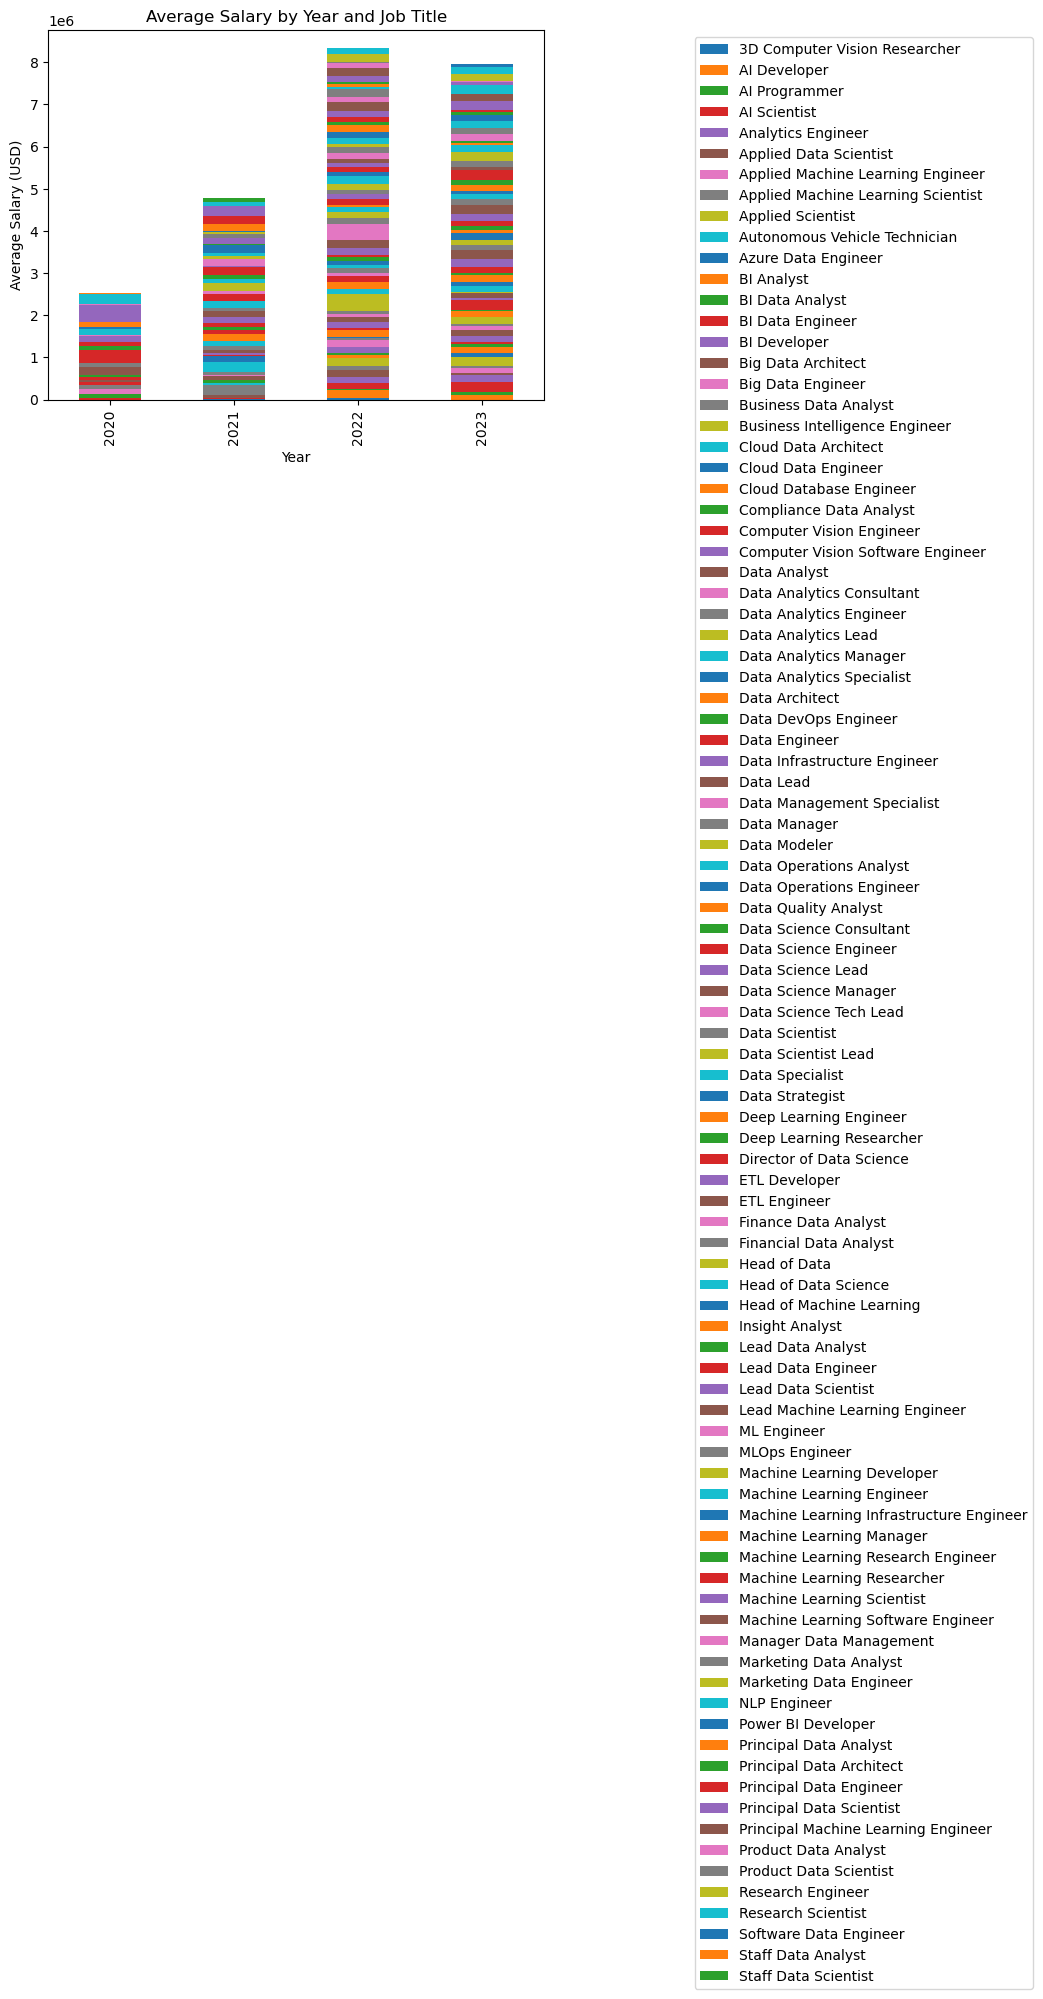

In [10]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pivot table as a bar chart
salary_jobtitle_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Year and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


### Salary vs Experience level

Creating the pivot table

In [11]:
salary_experience_pivot_table = pd.pivot_table(df,values='salary_in_usd',index='experience_level',columns='job_title',aggfunc='mean')
salary_experience_pivot_table.replace(np.nan,0,inplace=True)
salary_experience_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
experience_level,,,,,,,,,,,,,,,,,,,,,
EN,35000.0,130884.500000,55000.0,52781.285714,130000.000000,66679.000000,0.0,36696.00,167356.666667,7000.0,...,0.0,0.000000,0.0,100000.0,0.0,130000.000000,118280.888889,0.0,0.0,0.0
EX,0.0,0.000000,0.0,200000.000000,175125.000000,0.000000,0.0,0.00,0.000000,0.0,...,0.0,416000.000000,0.0,0.0,0.0,0.000000,84053.000000,0.0,15000.0,0.0
MI,5409.0,137510.000000,0.0,117726.200000,102480.230769,77977.000000,99875.5,135820.50,0.000000,45555.0,...,0.0,151000.000000,0.0,45621.5,0.0,178000.000000,141575.086957,75020.0,0.0,0.0
SE,10000.0,147666.666667,0.0,201278.000000,158404.024691,208439.333333,0.0,106279.75,192907.692308,0.0,...,192500.0,169728.166667,190000.0,0.0,8000.0,174773.181818,179892.979592,50000.0,0.0,105000.0


<Figure size 1000x1000 with 0 Axes>

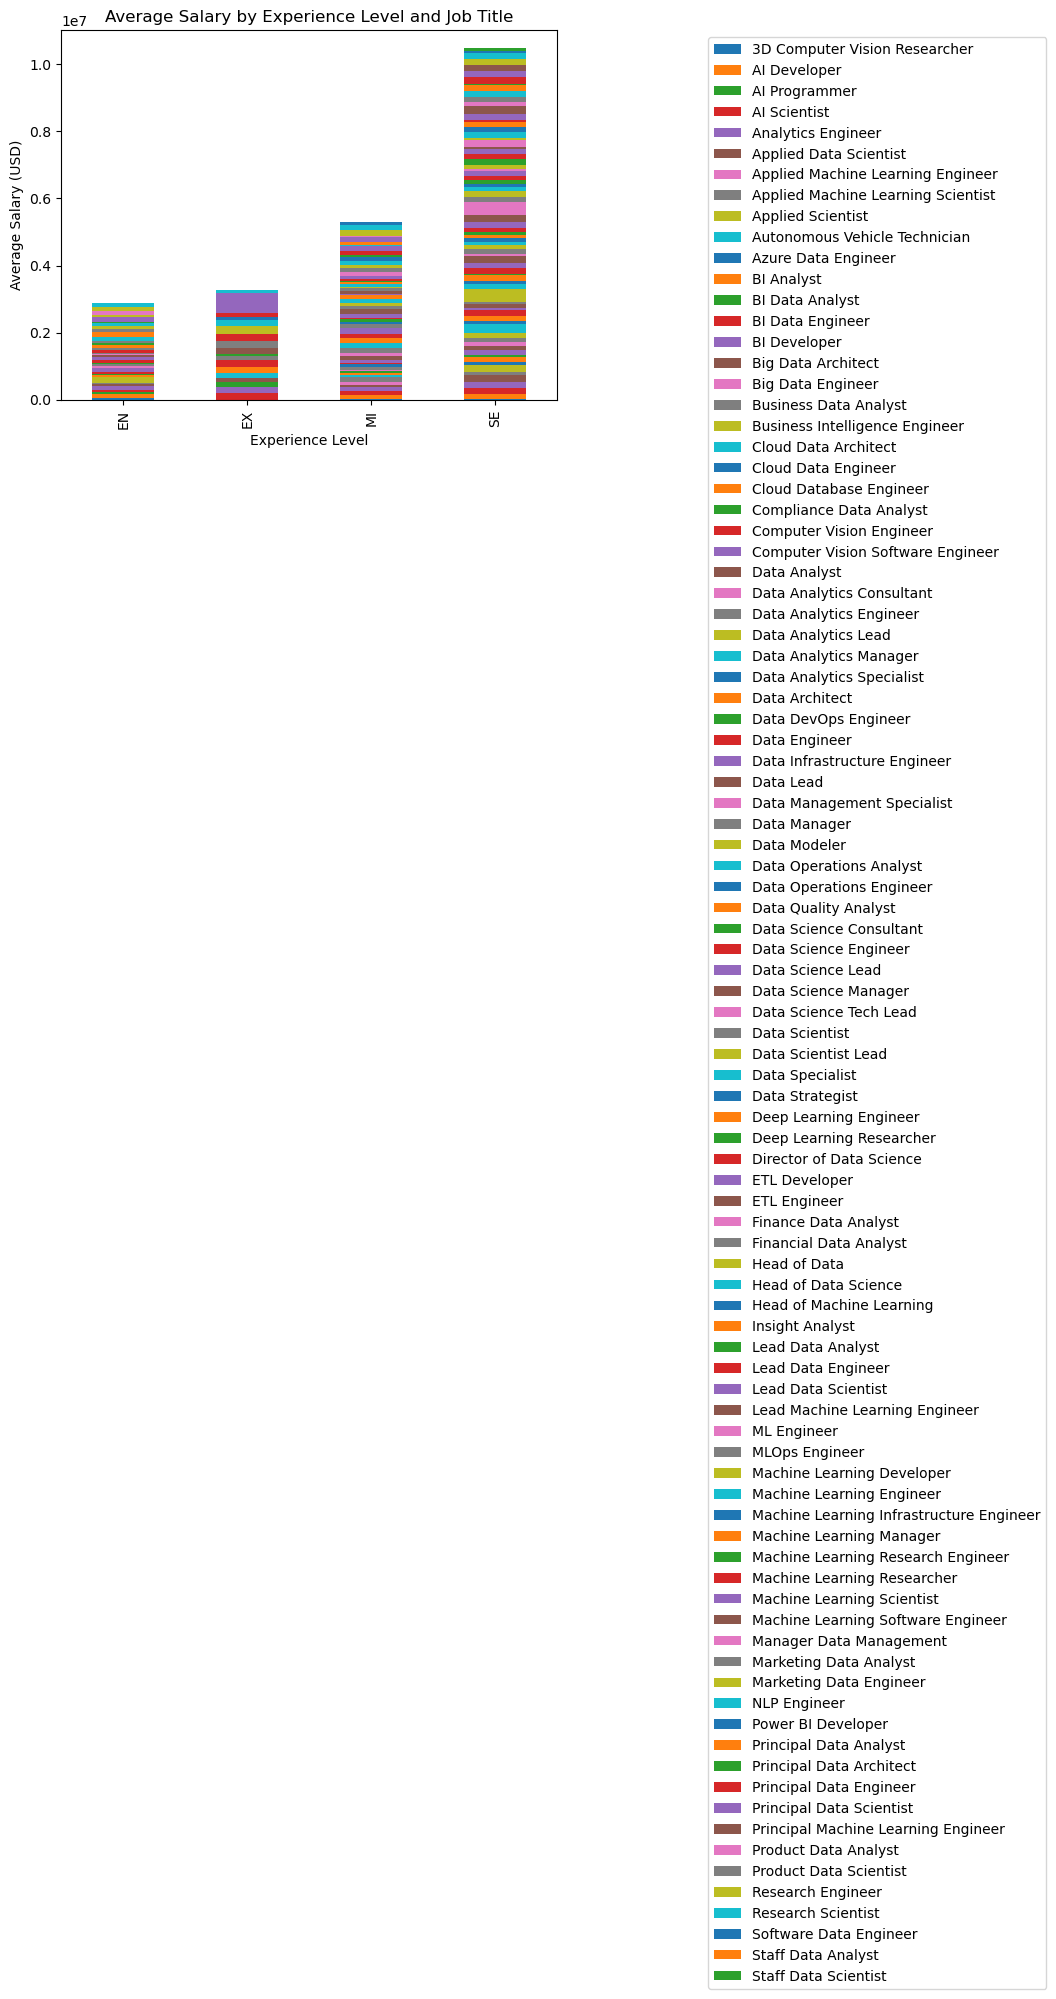

In [12]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pivot table as a bar chart
salary_experience_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


### Salary vs Employment type

In [13]:
salary_employment_type_pivot_table = pd.pivot_table(df,values='salary_in_usd',index='employment_type',columns='job_title',aggfunc='mean')
salary_employment_type_pivot_table.replace(np.nan,0,inplace=True)
salary_employment_type_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
employment_type,,,,,,,,,,,,,,,,,,,,,
CT,0.000000,0.000000,0.0,0.000000,7500.000000,0.0,0.0,30469.0,0.000000,0.0,...,0.0,416000.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,105000.0
FL,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,30523.0,0.000000,45555.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,50000.0,0.0,0.0
FT,26666.666667,136666.090909,55000.0,124138.142857,153788.911765,113726.3,99875.5,125244.2,190264.482759,7000.0,...,192500.0,167052.714286,190000.0,56497.2,8000.0,163108.378378,161214.195122,75020.0,15000.0,0.0
PT,5409.000000,0.000000,0.0,12000.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


<Figure size 1000x1000 with 0 Axes>

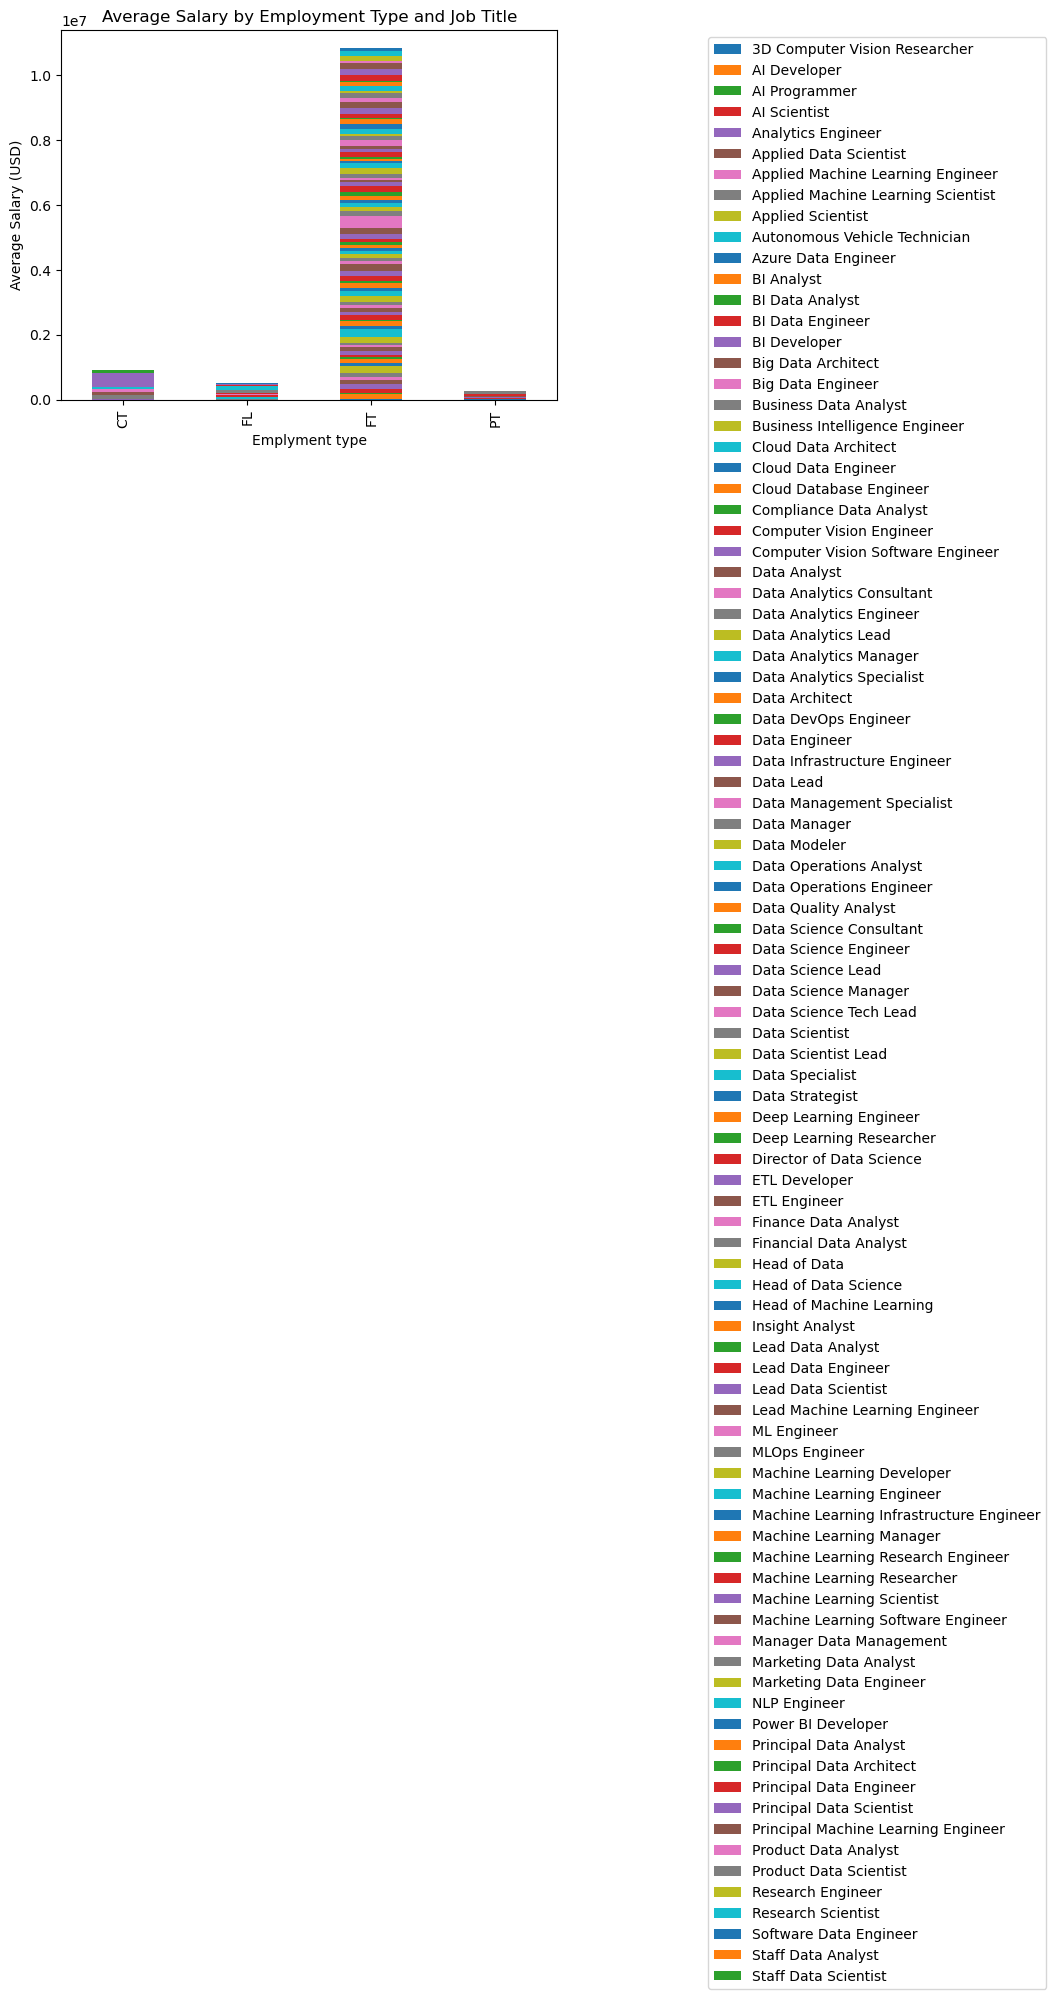

In [14]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pivot table as a bar chart
salary_employment_type_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Emplyment type')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Employment Type and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


### Salary vs Employee residence

In [15]:
salary_employee_residence_pivot_table = pd.pivot_table(df,values='salary_in_usd',index='employee_residence',columns='job_title')
salary_employee_residence_pivot_table.replace(np.nan,0,inplace=True)
salary_employee_residence_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
employee_residence,,,,,,,,,,,,,,,,,,,,,
AE,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AM,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,48000.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AS,20000.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,45555.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.000000,50000.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,61989.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
UA,0.0,84000.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
US,50000.0,200000.0,0.0,142500.0,160244.395604,238000.0,130000.0,188800.0,190264.482759,0.0,...,192500.0,255500.0,190000.0,120000.0,0.0,168156.580645,181411.929825,0.0,0.0,105000.0


<Figure size 1000x1000 with 0 Axes>

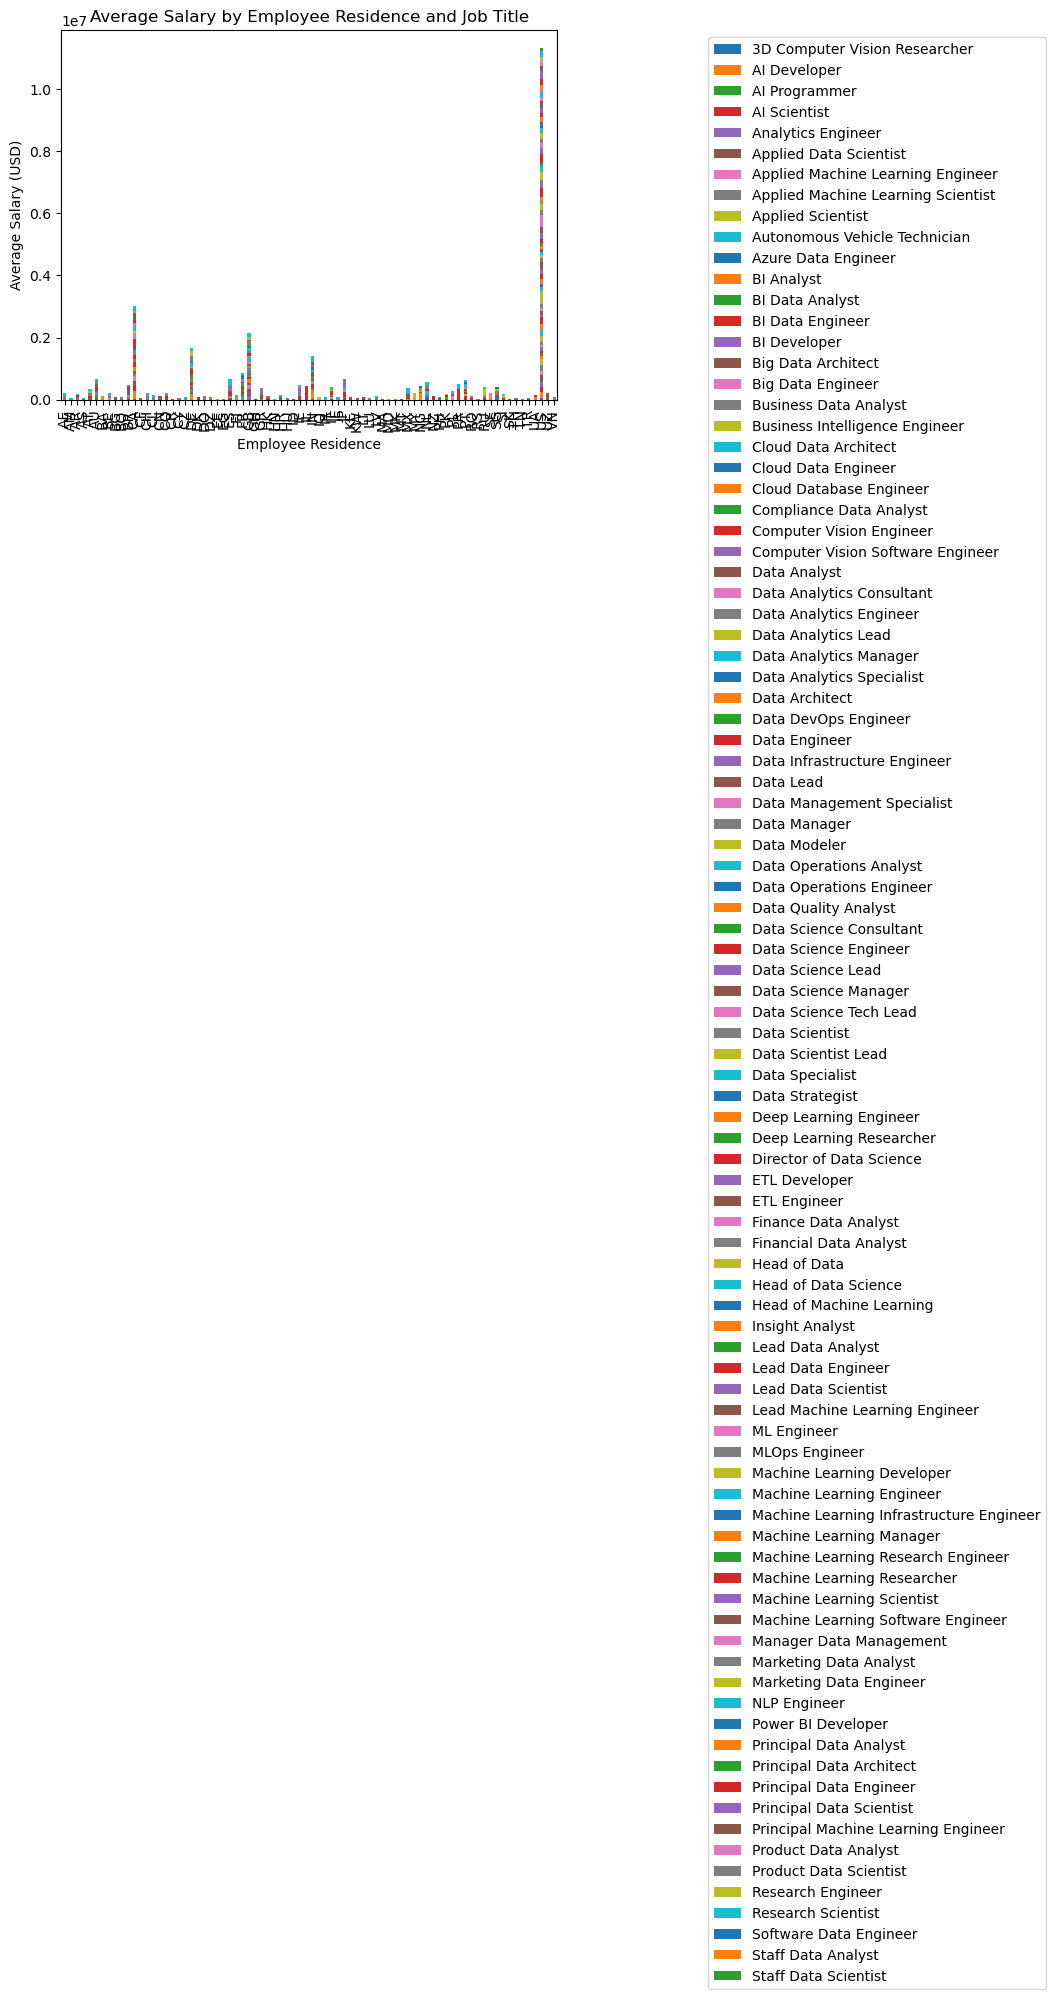

In [16]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pivot table as a bar chart
salary_employee_residence_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Employee Residence and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


### Salary vs Remote ratio

In [17]:
salary_remote_ratio_pivot_table = pd.pivot_table(df,values='salary_in_usd',index='remote_ratio',columns='job_title')
salary_remote_ratio_pivot_table.replace(np.nan,0,inplace=True)
salary_remote_ratio_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
remote_ratio,,,,,,,,,,,,,,,,,,,,,
0,20000.0,98118.166667,70000.0,191278.000000,160663.369565,110037.000000,130000.0,108000.000000,191116.875000,7000.0,...,0.0,220000.000000,0.0,20000.0,0.0,173395.133333,174970.777778,0.0,15000.0,0.0
50,7704.5,166666.666667,0.0,94842.333333,68750.000000,52119.000000,0.0,212974.333333,0.000000,45555.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,97190.000000,50000.0,0.0,0.0
100,50000.0,207309.000000,40000.0,90357.300000,148471.890909,131855.428571,69751.0,70813.875000,189215.384615,0.0,...,192500.0,195052.714286,190000.0,65621.5,8000.0,119022.285714,158944.235294,75020.0,0.0,105000.0


<Figure size 1000x1000 with 0 Axes>

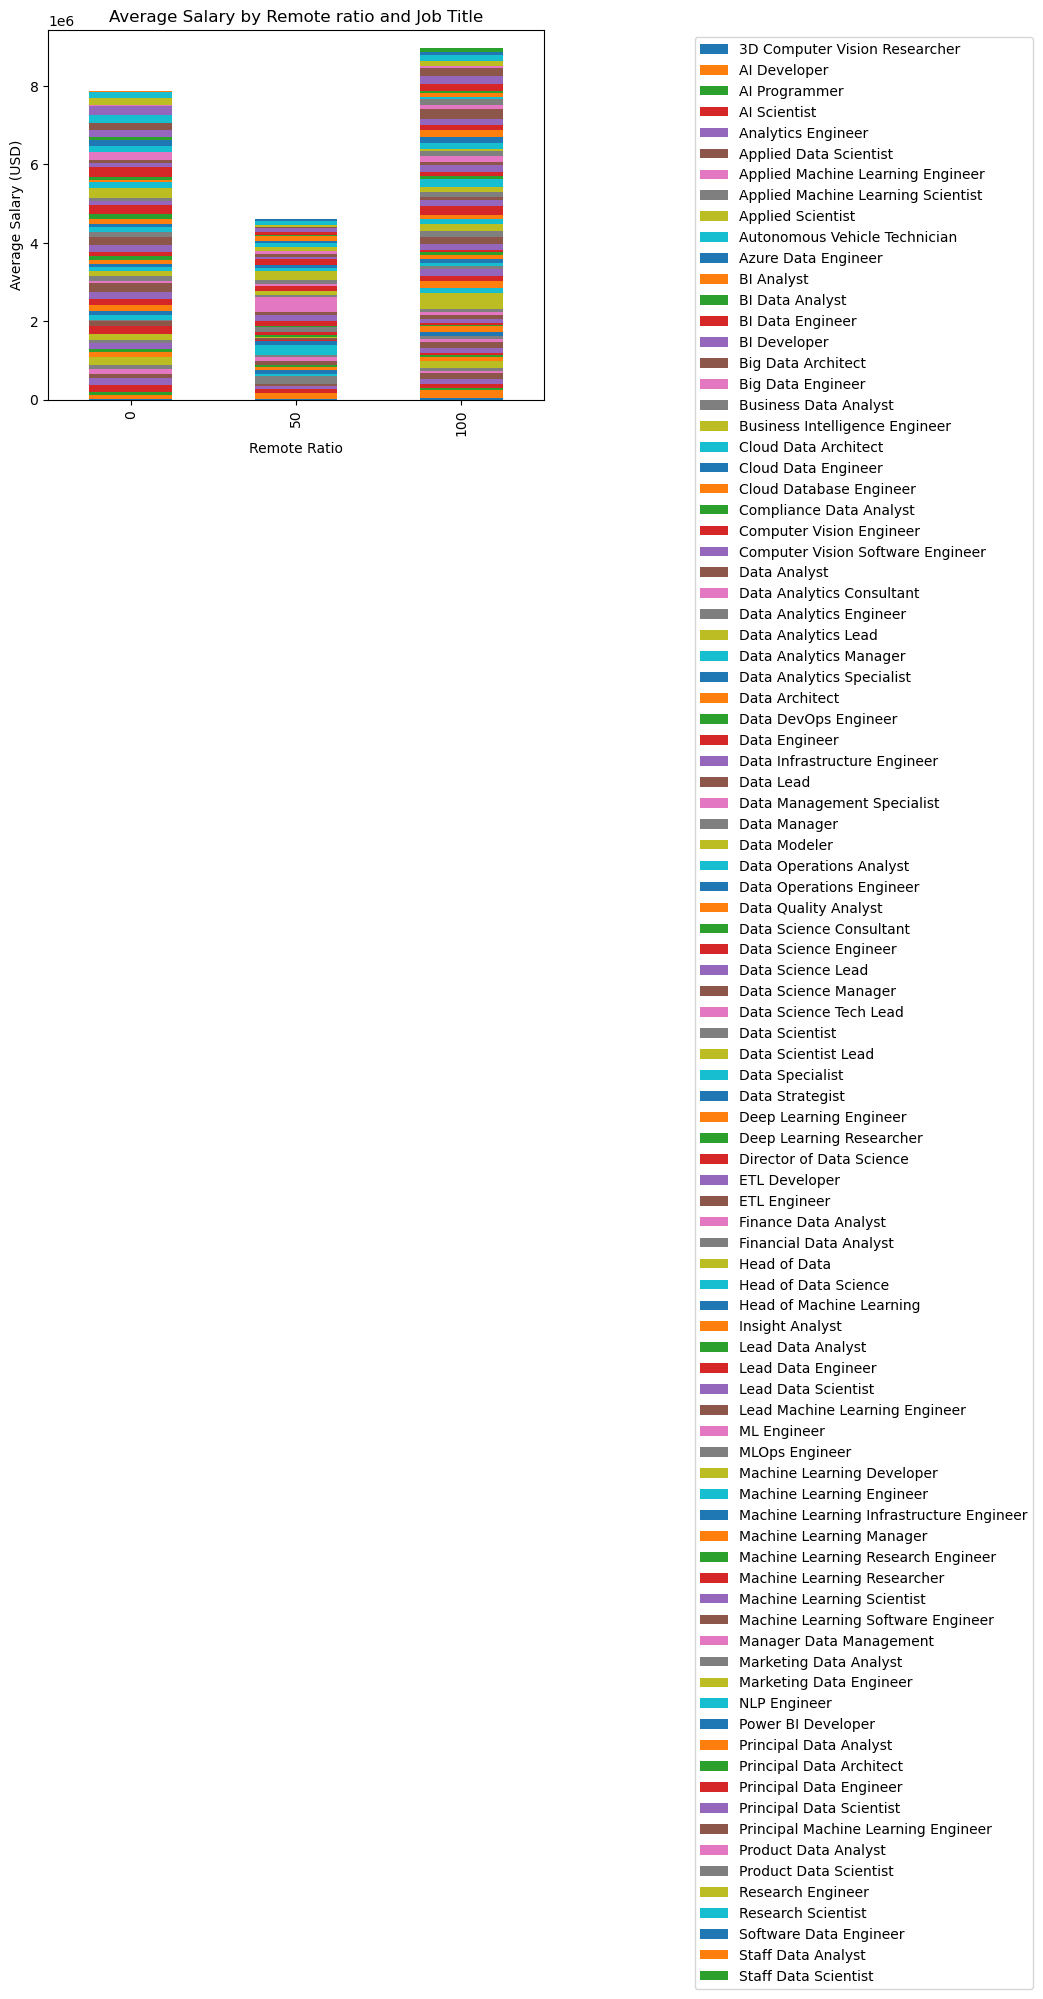

In [18]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pivot table as a bar chart
salary_remote_ratio_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Remote ratio and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


### Salary vs Company location

In [19]:
salary_company_location_pivot_table = pd.pivot_table(df,index='company_location',values='salary_in_usd',columns='job_title')
salary_company_location_pivot_table.replace(np.nan,0,inplace=True)
salary_company_location_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
company_location,,,,,,,,,,,,,,,,,,,,,
AE,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AL,10000.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AM,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
AS,20000.0,0.0,0.0,18053.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TH,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
TR,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
UA,0.0,84000.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


<Figure size 1500x1500 with 0 Axes>

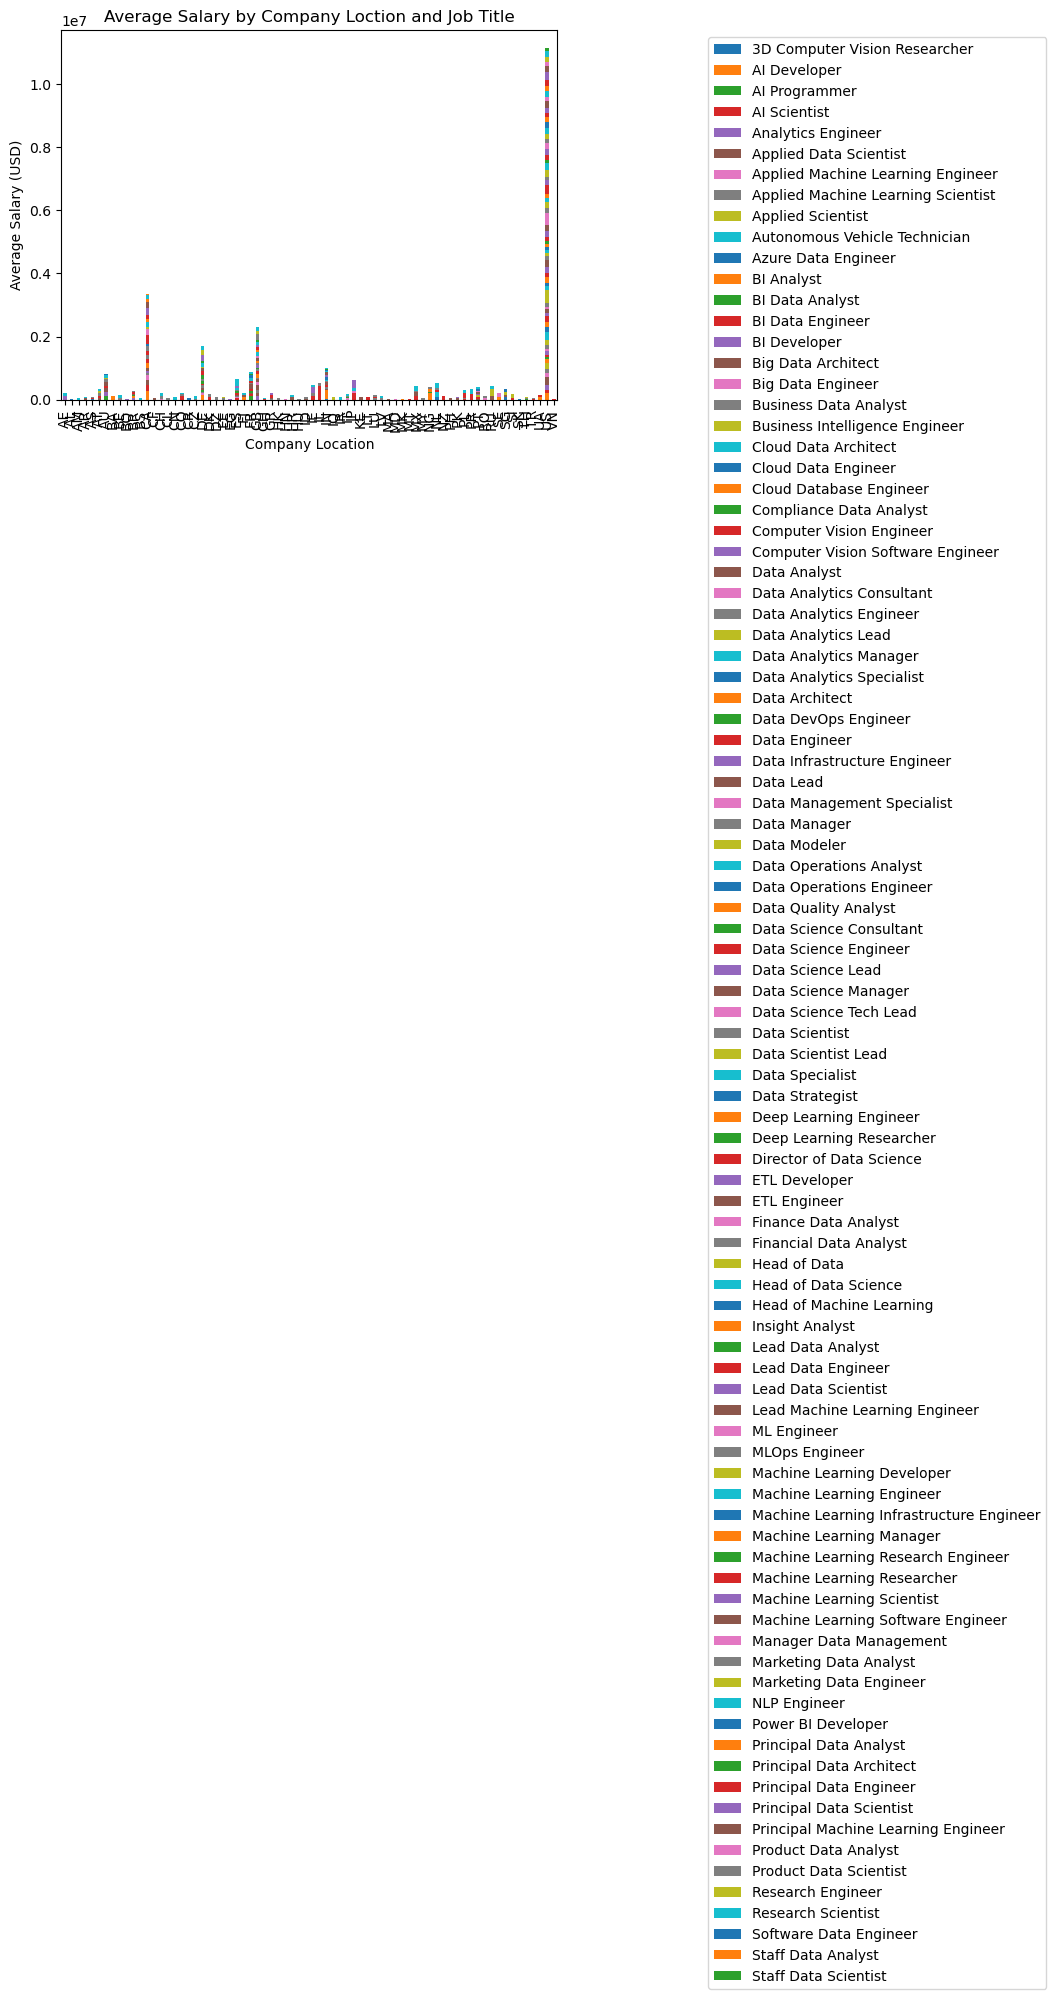

In [20]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 15))

# Plot the pivot table as a bar chart
salary_company_location_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Loction and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


### Salary vs Company size

In [21]:
salary_company_size_pivot_table = pd.pivot_table(df,values='salary_in_usd',index='company_size',columns='job_title')
salary_company_size_pivot_table.replace(np.nan,0,inplace=True)
salary_company_size_pivot_table

job_title,3D Computer Vision Researcher,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,Autonomous Vehicle Technician,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
company_size,,,,,,,,,,,,,,,,,,,,,
L,0.0,257309.000000,70000.0,173744.166667,130000.000000,149824.166667,0.0,154623.800000,191024.666667,0.0,...,185000.0,172961.75,190000.0,11243.0,8000.0,0.000000,101745.800000,75020.0,0.0,0.0
M,12704.5,97900.833333,40000.0,82704.000000,153623.455446,52772.666667,130000.0,84965.333333,189450.000000,45555.0,...,200000.0,159174.00,0.0,120000.0,0.0,166910.114286,180579.460317,50000.0,15000.0,105000.0
S,30000.0,133768.000000,0.0,61189.800000,48000.000000,80000.000000,69751.0,30523.000000,0.000000,7000.0,...,0.0,416000.00,0.0,20000.0,0.0,96578.000000,79217.750000,0.0,0.0,0.0


<Figure size 1000x1000 with 0 Axes>

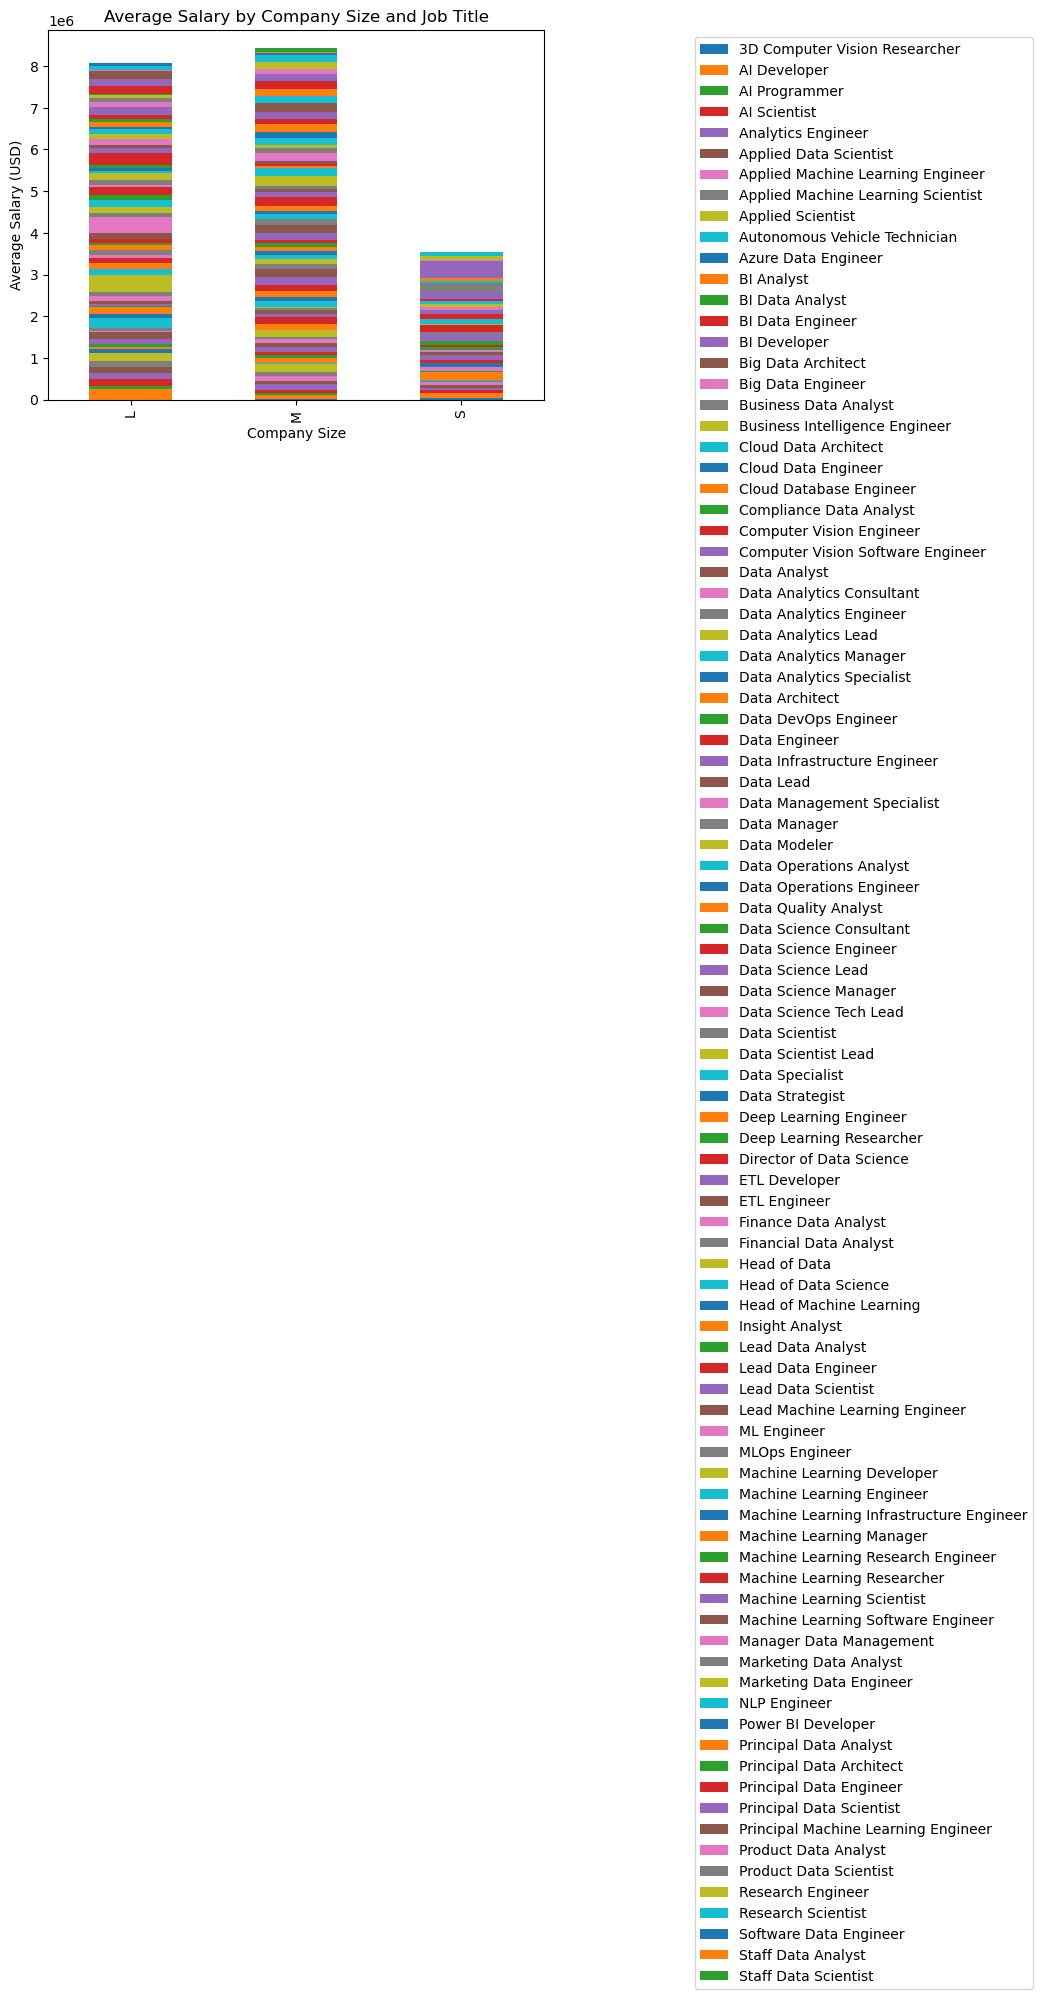

In [22]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pivot table as a bar chart
salary_company_size_pivot_table.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size and Job Title')
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Show the plot
plt.show()


## Machine Learning

## Classification

In this section, we're going to build a model that predicts the size of the company that the employee belongs to<br>
We're going to test 4 classification algorithms and compare the accuracy of each of them, and then deploy the model to be used on out-of-sample data

#### Data Pre-processing

In [23]:
from sklearn import preprocessing

In [24]:
features = df.columns
features = list(features)

features.remove('salary')
features.remove('salary_currency')
features.remove('company_size')


X = df[features].values

X

array([[2023, 'SE', 'FT', ..., 'ES', 100, 'ES'],
       [2023, 'MI', 'CT', ..., 'US', 100, 'US'],
       [2023, 'MI', 'CT', ..., 'US', 100, 'US'],
       ...,
       [2020, 'EN', 'FT', ..., 'US', 100, 'US'],
       [2020, 'EN', 'CT', ..., 'US', 100, 'US'],
       [2021, 'SE', 'FT', ..., 'IN', 50, 'IN']], dtype=object)

In [25]:
features

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location']

In [26]:
Y = df['company_size'].values
Y

array(['L', 'S', 'S', ..., 'S', 'L', 'L'], dtype=object)

In [27]:
X[:,1]

array(['SE', 'MI', 'MI', ..., 'EN', 'EN', 'SE'], dtype=object)

As you might see that there are some features that have categorical values, which is not convenient for an algorithm such as KNN, for that we can label them and convert them to int or floats

In [28]:
le = preprocessing.LabelEncoder()

for (index, feature) in enumerate(features):
    available_values = df[feature].unique()
    column_type = df[feature].dtype
    print(available_values)
    print(feature)
    print(index)

    # Checking if the type of the column is object
    if column_type == 'object':
        le.fit(available_values)
        # Perform label encoding or any other desired operations
        X[:,index] = le.transform(X[:,index])
        
X

[2023 2022 2020 2021]
work_year
0
['SE' 'MI' 'EN' 'EX']
experience_level
1
['FT' 'CT' 'FL' 'PT']
employment_type
2
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data 

array([[2023, 3, 2, ..., 26, 100, 25],
       [2023, 2, 0, ..., 75, 100, 70],
       [2023, 2, 0, ..., 75, 100, 70],
       ...,
       [2020, 0, 2, ..., 75, 100, 70],
       [2020, 0, 0, ..., 75, 100, 70],
       [2021, 3, 2, ..., 39, 50, 38]], dtype=object)

### Normalize the data

Now, we're going to normalize the data to equalize the features scales and improve the convergence towards an optmized solution

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X

array([[  0.90599446,   0.58573566,   0.02592668, ...,  -2.08756459,
          1.10591825,  -2.12181783],
       [  0.90599446,  -0.51784558, -14.95171653, ...,   0.46018613,
          1.10591825,   0.45062463],
       [  0.90599446,  -0.51784558, -14.95171653, ...,   0.46018613,
          1.10591825,   0.45062463],
       ...,
       [ -3.43330297,  -2.72500806,   0.02592668, ...,   0.46018613,
          1.10591825,   0.45062463],
       [ -3.43330297,  -2.72500806, -14.95171653, ...,   0.46018613,
          1.10591825,   0.45062463],
       [ -1.9868705 ,   0.58573566,   0.02592668, ...,  -1.41163073,
          0.07674278,  -1.37866779]])

### Train/Test split

We won't train our model on all of the data we have, as It will give as a specialized model that will not give good and accurate results. For that, we gonna split our dataset into 2 parts (Train Data and Test Data)

In [30]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=4)

train_x.shape


(3004, 8)

### K-nearest neighbours

The first algorithm that we will try is the KNN

In [31]:
accuracies = []

#### Training

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=4)

knc.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=4)

#### Prediction

In [33]:
yhat = knc.predict(test_x)

yhat

array(['M', 'M', 'M', 'M', 'L', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'L',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'S', 'M', 'M', 'M', 'M', 'L',
       'M', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'L', 'M', 'M', 'M', 'L', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'L', 'L', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'M', 'S',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'M', 'M', 'M', 'L',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'L', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M',
       'M', 'L', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'L', 'M', 'M

#### Model evaluation

In [34]:
from sklearn.metrics import accuracy_score

print(f"The train set accuracy is {accuracy_score(train_y,knc.predict(train_x))}")
print(f"The accuracy of test set is {accuracy_score(yhat,test_y)}")

The train set accuracy is 0.8994673768308922
The accuracy of test set is 0.848202396804261


That was only an example of 4 neighbours, let us now try neighours from 1 to 10

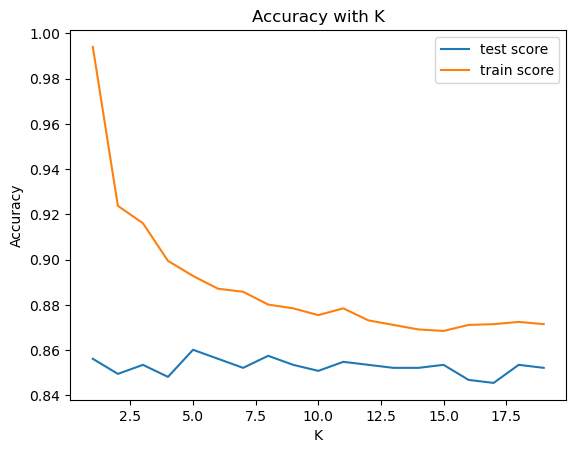

In [35]:
test_scores = []
train_scores = []

Ks = 20

for i in range(1,Ks):

    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(train_x,train_y)
    yhat = knc.predict(test_x)

    test_score = accuracy_score(yhat,test_y)
    train_score = accuracy_score(train_y,knc.predict(train_x))

    test_scores.append(test_score)
    train_scores.append(train_score)

plt.plot(range(1,Ks),test_scores)
plt.plot(range(1,Ks),train_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy with K")
plt.legend(['test score','train score'])


In [36]:
print(f"The best accuracy in our dataset is {max(test_scores)} with K={test_scores.index(max(test_scores))}")
accuracies.append(max(test_scores))

The best accuracy in our dataset is 0.8601864181091877 with K=4


So the K with the highest accuracy is **K=4** with an accuracy of **0.860186418091877**

Let us now, evaluate our model using Jaccard Index


In [37]:
from sklearn.metrics import jaccard_score

print(f"The Jaccard score for this model is {jaccard_score(test_y,yhat,average='micro')}")

The Jaccard score for this model is 0.7424593967517401


As we have a multi-class classification, we need to set-up an average which can be of {None, micro, macro and weighted}
<br>We chose micro, because It calculates the total true positives, false positives, true negatives and false negative across all classes

Let us now try and plot the confusion matrix of our model to see the precision of our model with each and every class

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(test_y,yhat,labels = df['company_size'].unique())
print(cnf_matrix)

[[ 30   1  64]
 [ 13   0  15]
 [ 16   2 610]]


Plotting the confusion matrix

Confusion matrix, without normalization
[[ 30   1  64]
 [ 13   0  15]
 [ 16   2 610]]


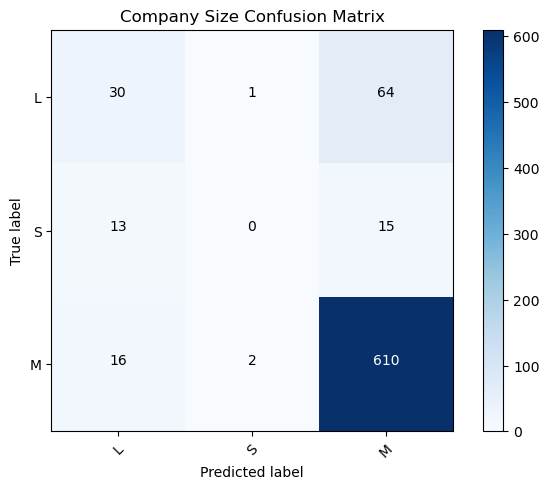

In [39]:
plot_confusion_matrix(cnf_matrix,df['company_size'].unique(),title="Company Size Confusion Matrix")

Seeing this plot, we conclude that : <br>
**Large** companies, he got 64 of them as medium, 1 as Small and 30 as Large, which is not that accurate<br>
**Small** companies, he got 15 of them as medium, 0 as Small and 13 as Large, which is not that accurate<br>
**Medium** companies, he got 610 of them as medium, 2 as Small and 16 as Large, which is really accurate<br>

We can explain this with the amount of Data for each category, as we have so much data for medium sized companies and not that much for Small and Large companies

We can also see the classification report to give an eye of the f1_score, precision and recall

In [40]:
print(classification_report(test_y,yhat))

              precision    recall  f1-score   support

           L       0.51      0.32      0.39        95
           M       0.89      0.97      0.93       628
           S       0.00      0.00      0.00        28

    accuracy                           0.85       751
   macro avg       0.46      0.43      0.44       751
weighted avg       0.80      0.85      0.82       751



We can see here that f1-score for the Medium companies is 0.93 which is high in comparaison with Large and Small companies which are 0.39 and 0 respectively

### Decision Trees

Now, we're trying using Decision trees to decide the class of a company

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_depth=6)

Training the model

In [42]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Prediction

In [43]:
yhat = dt.predict(test_x)

yhat[:5]

array(['M', 'M', 'M', 'M', 'S'], dtype=object)

Let us now plot the decision tree to see the logic behind It

[Text(0.4054878048780488, 0.9285714285714286, 'x[0] <= -1.264\nentropy = 0.762\nsamples = 3004\nvalue = [359, 2525, 120]'),
 Text(0.16310975609756098, 0.7857142857142857, 'x[4] <= 0.025\nentropy = 1.452\nsamples = 242\nvalue = [131, 52, 59]'),
 Text(0.08536585365853659, 0.6428571428571429, 'x[3] <= -2.059\nentropy = 1.519\nsamples = 190\nvalue = [91, 47, 52]'),
 Text(0.07317073170731707, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.0975609756097561, 0.5, 'x[4] <= -1.837\nentropy = 1.513\nsamples = 188\nvalue = [91, 45, 52]'),
 Text(0.04878048780487805, 0.35714285714285715, 'x[5] <= -0.658\nentropy = 1.487\nsamples = 27\nvalue = [9, 5, 13]'),
 Text(0.024390243902439025, 0.21428571428571427, 'x[5] <= -1.568\nentropy = 1.268\nsamples = 21\nvalue = [6, 2, 13]'),
 Text(0.012195121951219513, 0.07142857142857142, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.036585365853658534, 0.07142857142857142, 'entropy = 1.248\nsamples = 16\nvalue = [6, 1, 9]'),
 Text(0.07

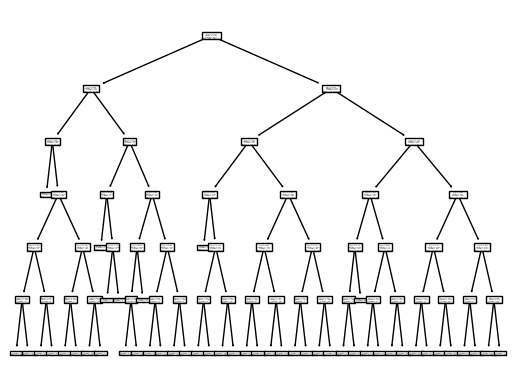

In [44]:
import sklearn.tree as tree

tree.plot_tree(dt)

#### Model evaluation

In [45]:
print(f"The accuracy score for Decision Trees is {accuracy_score(test_y,yhat)}")
print(f"The Jaccard score for Decision Trees is {jaccard_score(test_y,yhat,average='micro')}")
print(classification_report(test_y,yhat))
accuracies.append(accuracy_score(test_y,yhat))

The accuracy score for Decision Trees is 0.8615179760319573
The Jaccard score for Decision Trees is 0.7567251461988304
              precision    recall  f1-score   support

           L       0.53      0.55      0.54        95
           M       0.93      0.94      0.94       628
           S       0.14      0.07      0.10        28

    accuracy                           0.86       751
   macro avg       0.53      0.52      0.52       751
weighted avg       0.85      0.86      0.85       751



We see now that we have improved the accuracy score from 0.84 to 0.86, at the end we will do a comparaison of evaluations to choose the optimal model

#### Logistic Regression

Training

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01,solver='liblinear')

lr.fit(train_x,train_y)



LogisticRegression(C=0.01, solver='liblinear')

Prediction

In [47]:
yhat = lr.predict(test_x)
yhat[:5]

array(['M', 'M', 'M', 'M', 'L'], dtype=object)

We can also see the probability of these predictions

In [48]:
yhat_proba = lr.predict_proba(test_x)
yhat_proba[:5]

array([[0.15253828, 0.76517686, 0.08228487],
       [0.17032773, 0.74279451, 0.08687775],
       [0.08069931, 0.86720341, 0.05209728],
       [0.28849756, 0.46628218, 0.24522026],
       [0.48883585, 0.38658212, 0.12458203]])

#### Model evaluation

In [49]:
print(f"The accuracy score for Decision Trees is {accuracy_score(test_y,yhat)}")
print(f"The Jaccard score for Decision Trees is {jaccard_score(test_y,yhat,average='micro')}")
print(classification_report(test_y,yhat))
accuracies.append(accuracy_score(test_y,yhat))

The accuracy score for Decision Trees is 0.8468708388814914
The Jaccard score for Decision Trees is 0.7344110854503464
              precision    recall  f1-score   support

           L       0.44      0.20      0.28        95
           M       0.87      0.98      0.92       628
           S       0.00      0.00      0.00        28

    accuracy                           0.85       751
   macro avg       0.44      0.39      0.40       751
weighted avg       0.78      0.85      0.81       751



Confusion matrix, without normalization
[[ 19   0  76]
 [ 13   0  15]
 [ 11   0 617]]


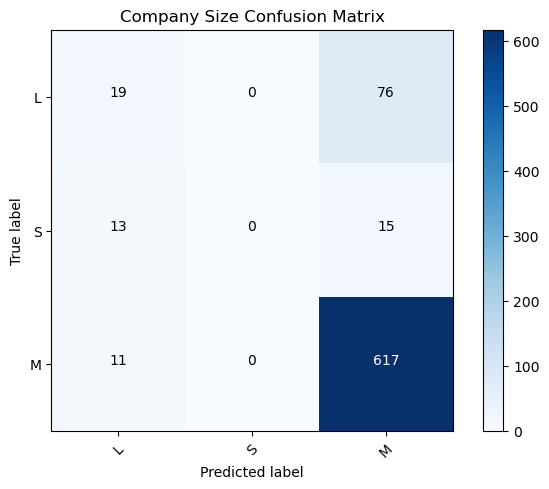

In [50]:
cnf_matrix = confusion_matrix(test_y,yhat,labels = df['company_size'].unique())

plot_confusion_matrix(cnf_matrix,df['company_size'].unique(),title="Company Size Confusion Matrix")

We see that this model got all of the S business wrong, but he got most of the Medium companies correct

### SVM

Now, we're going to try and work with an SVM model with 4 parameters (linear, rbf, polynomial and sigmoid)

In [51]:
from sklearn import svm

sv_model = svm.SVC(kernel='rbf')

Training model

In [52]:
sv_model.fit(train_x,train_y)

SVC()

Predictions

In [53]:
yhat = sv_model.predict(test_x)

yhat[:5]

array(['M', 'M', 'M', 'M', 'L'], dtype=object)

#### Model evaluation

In [54]:
print(f"The accuracy score for SVM is {accuracy_score(test_y,yhat)}")
print(f"The Jaccard score for SVM is {jaccard_score(test_y,yhat,average='micro')}")
print(classification_report(test_y,yhat))
accuracies.append(accuracy_score(test_y,yhat))

The accuracy score for SVM is 0.8601864181091877
The Jaccard score for SVM is 0.7546728971962616
              precision    recall  f1-score   support

           L       0.52      0.39      0.45        95
           M       0.90      0.97      0.93       628
           S       1.00      0.04      0.07        28

    accuracy                           0.86       751
   macro avg       0.81      0.46      0.48       751
weighted avg       0.85      0.86      0.84       751



Confusion matrix, without normalization
[[ 37   0  58]
 [ 14   1  13]
 [ 20   0 608]]


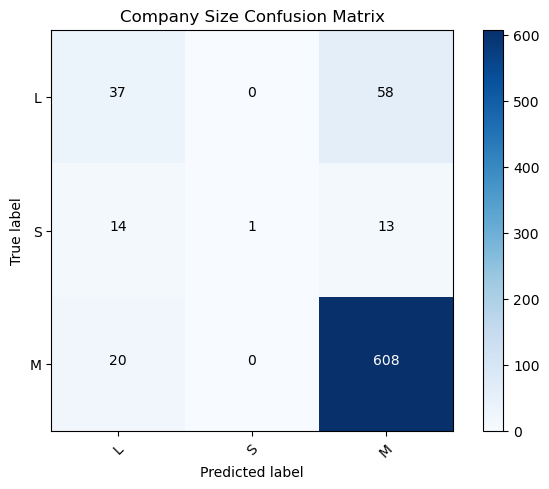

In [55]:
cnf_matrix = confusion_matrix(test_y,yhat,labels = df['company_size'].unique())

plot_confusion_matrix(cnf_matrix,df['company_size'].unique(),title="Company Size Confusion Matrix")

After using the SVM, we can see that we got an accuracy of 0.86 using the rbf which was the most optimal in our case, after comparing It to other kernels

## Model Comparaison

In this section, we're going to compare the accuracy that we got from all of the models

In [56]:
accuracies

[0.8601864181091877,
 0.8615179760319573,
 0.8468708388814914,
 0.8601864181091877]

<BarContainer object of 4 artists>

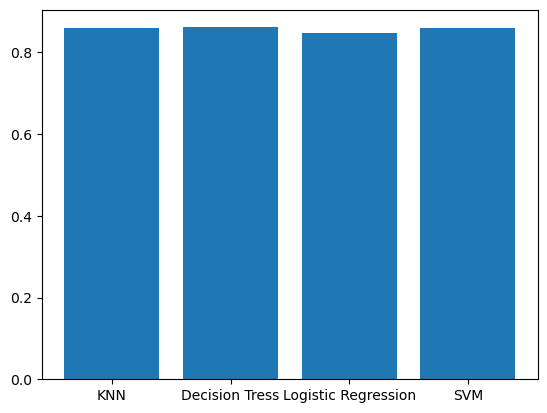

In [57]:
models = ['KNN','Decision Tress','Logistic Regression','SVM']

plt.bar(models,accuracies)

We can see that all of the models are close to each other in the matter of the accuracy, but we can see that the model with the most accuracy are SVM and KNN with an accuracy of **0.8601864181091877**

## Using cross-validation

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [84]:
kfold = KFold(n_splits=3)

scores = cross_val_score(lr,X,Y,cv=kfold,scoring='accuracy')
# Print the mean and standard deviation of the scores
print("\n===== Logistic Regression =====")
print(f"Mean accuracy: {scores.mean()}") 
print(f"Standard deviation: {scores.std()}")

scores = cross_val_score(sv_model,X,Y,cv=kfold,scoring='accuracy')
# Print the mean and standard deviation of the scores
print("\n===== SVM =====")
print(f"Mean accuracy: {scores.mean()}") 
print(f"Standard deviation: {scores.std()}")

scores = cross_val_score(dt,X,Y,cv=kfold,scoring='accuracy')
# Print the mean and standard deviation of the scores
print("\n===== Decision Trees =====")
print(f"Mean accuracy: {scores.mean()}") 
print(f"Standard deviation: {scores.std()}")

scores = cross_val_score(knc,X,Y,cv=kfold,scoring='accuracy')
# Print the mean and standard deviation of the scores
print("\n===== KNN =====")
print(f"Mean accuracy: {scores.mean()}") 
print(f"Standard deviation: {scores.std()}")




===== Logistic Regression =====
Mean accuracy: 0.8417655651836359
Standard deviation: 0.12047562539652273

===== SVM =====
Mean accuracy: 0.842830315087653
Standard deviation: 0.12178400560948695

===== Decision Trees =====
Mean accuracy: 0.8361774903825608
Standard deviation: 0.1088393026964943

===== KNN =====
Mean accuracy: 0.8359061419660864
Standard deviation: 0.12229744692622098
